<a href="https://colab.research.google.com/github/Abimonalex/DS-LAB/blob/main/DS_LAB_13_KMEANS_WINE_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[9.98181818e-01 6.95745455e+00 2.93827273e-01 3.53563636e-01
  9.32659091e+00 5.18572727e-02 5.08386364e+01 1.97745000e+02
  9.96282668e-01 3.17890909e+00 5.14827273e-01 9.71222727e+00]
 [8.51272016e-01 6.94603718e+00 3.12265166e-01 3.13116438e-01
  4.10694716e+00 4.84422701e-02 2.52267613e+01 9.86594912e+01
  9.93077813e-01 3.20259785e+00 5.06678082e-01 1.09561807e+01]
 [9.71731449e-01 6.88538617e+00 2.82122665e-01 3.37829379e-01
  6.72496214e+00 4.82781424e-02 3.70911156e+01 1.44593640e+02
  9.94437807e-01 3.18968198e+00 4.91438667e-01 1.03895995e+01]
 [9.83965015e-02 8.25298834e+00 4.98462099e-01 2.70852770e-01
  2.46712828e+00 8.18454810e-02 1.26526968e+01 3.37995627e+01
  9.96210459e-01 3.29393586e+00 6.36793003e-01 1.05725583e+01]]
[2 2 1 ... 3 3 3]
[[ 84.56557573   0.85449134]
 [-17.88536062  -1.22289268]
 [ 29.61578252  -0.26454669]
 [-83.916415     1.51874574]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


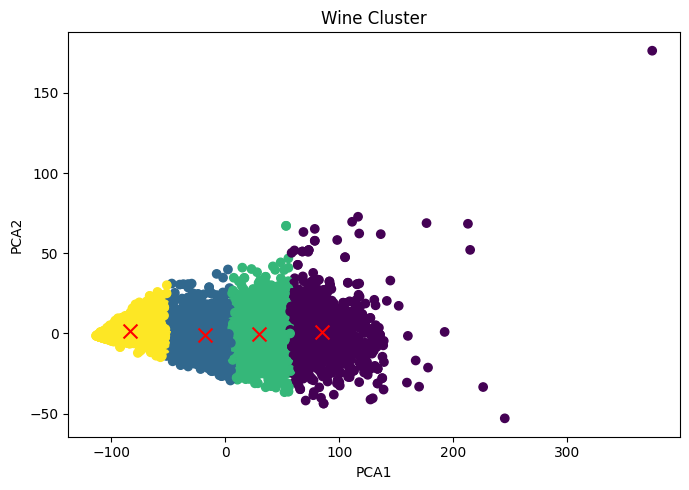

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df=pd.read_csv('/content/WineQuality.csv')
print(df.head())

print(df.isnull().sum())

df.fillna(0, inplace=True)

print(df.isnull().sum())

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
print(df['type'])

x=df.drop(['quality'], axis=1)
y=df['quality']


from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(x)

print(km.cluster_centers_)


print(km.labels_)

pca = PCA(n_components=2)
reduced_X = pd.DataFrame(data=pca.fit_transform(x), columns=['PCA1', 'PCA2'])
# Reduced Features
reduced_X.head()

centers = pca.transform(km.cluster_centers_)

# reduced centers
print(centers)
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'], c=km.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()
plt.show()
